<a href="https://colab.research.google.com/github/rictika/Rictika15/blob/main/Programming_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive; drive.mount('/content/drive')

Mounted at /content/drive


<Figure size 1200x600 with 0 Axes>

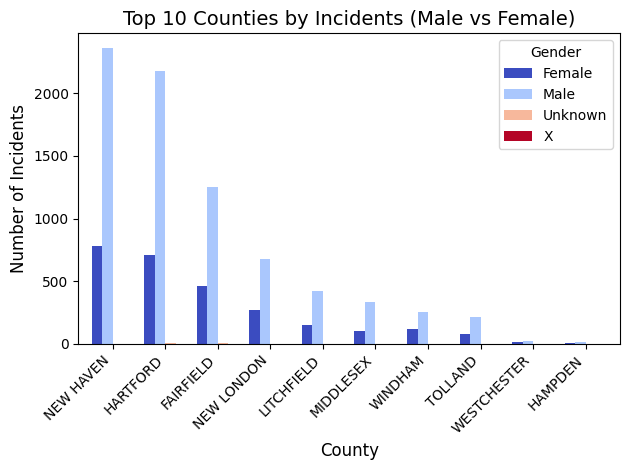

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

#The dataset is loaded into a DataFrame from a CSV file. It contains information about accidental drug-related deaths from 2012 to 2023.
data = pd.read_csv("/content/drive/MyDrive/Assighnemnt_1/Accidental_Drug_Related_Deaths_2012-2023.csv")

# Data cleaning
data['Sex'] = data['Sex'].str.strip().str.title() # Removes extra spaces and capitalizes the first letter.
data['Fentanyl'] = data['Fentanyl'].str.strip().str.upper() # Remove spaces and converts all text to uppercase
data['Age'] = data['Age'].fillna(data['Age'].median())  # Missing values in the "Age" column are replaced with the median value of that column. This is a common practice for handling missing numerical data.
data['Sex'] = data['Sex'].fillna('Unknown') # Missing values in the "Sex" column are replaced with "Unknown"


residence_gender = data.groupby(['Sex', 'Residence County']).size().unstack(fill_value=0)  # This groups the data first by Sex and then by Residence County. For each combination of Sex and Residence County, it counts the occurrences
top_counties = residence_gender.sum(axis=0).sort_values(ascending=False).head(10).index # Sums the values across rows to get the total number of incidents per county.
top_residence_gender = residence_gender[top_counties] # Filters the original data to include only the top 10 counties


plt.figure(figsize=(12, 6)) # Adjusts a figure's initial dimensions to 12 inches wide by 6 inches tall.
top_residence_gender.T.plot(kind='bar', colormap="coolwarm", width=0.8) # Plotting a bar chart for the top residence counties, with gender distribution.

plt.title("Top 10 Counties by Incidents (Male vs Female)", fontsize=14) # Adds a title to the plot.
plt.ylabel("Number of Incidents", fontsize=12)  # Labels the y-axis (Number of Incidents) and x-axis (County).
plt.xlabel("County", fontsize=12)
plt.legend(title="Gender", loc="upper right") # Adds a legend to the plot with the title "Gender".
plt.xticks(rotation=45, ha="right") # Rotates the x-axis labels (county names) by 45 degrees for better readability.
plt.tight_layout()
plt.show()